In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


In [13]:
A = np.array([                      
    [1.6, 1.3, 1.0, 0.8, 0.5],
    [1.9, 1.6, 1.3, 1.0, 0.8], #Average points obtained in a game between clubs spending certain amounts
    [2.1, 1.9, 1.6, 1.3, 1.0],
    [2.3, 2.1, 1.9, 1.6, 1.3],
    [2.5, 2.3, 2.1, 1.8, 1.5]
])


Cost = [15.91,37.1,63.47,110.47,209.89]

Runs = 500




In [4]:
def Get_Profit(A, Population, Cost, i):
    #Returns profit of a strategy in the given population
    term = 2 * np.sum(A[i, :] * Population) - 2 * A[i, i] * Population[i]  # Summation term
    return(-(1059.558838 + Cost[i])
            + 51.712382 * term
            - 0.953450 * (term)**2
            + 0.009183 * (term)**3
            - 0.000034 * (term)**4)

def Get_Fitness(A, Population, Cost):
    #Returns array of fitness function of v_i in a given population
    Fitness = np.zeros(5) #fitness function

    for i in range(5):
        profit = Get_Profit(A, Population, Cost, i)
        Fitness[i] = np.exp(0.04 * profit)
        
    return(Fitness)

In [5]:
def Get_Mutation_Matrix(Population, Fitness, Generation):
    # Returns the matrix of mutation probabilities in a given population
    Mut_matrix = [                      
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0.001, 0, 0, 0, 0],
    [0.001, 0.01, 0.05, 0, 0]]
    
    for a in range(4):
        for b in range(5):
            if Fitness[a] >= Fitness[b]:
                Mut_matrix[a][b] = 0
            else:
                (Mut_matrix[a])[b] = (Mut_matrix[a])[b] * 0.005 * (1 - np.exp(-(Fitness[b]/Fitness[a])))
    return(Mut_matrix)





In [6]:
def Moran_Process(Population, Runs, A):
    #Runs the full Moran process. Returns all necessary values to plot the system
    Population = list(Population)
    Pop_Over_Time0 = list(0 for x in range(Runs))
    Pop_Over_Time1 = list(0 for x in range(Runs))
    Pop_Over_Time2 = list(0 for x in range(Runs))
    Pop_Over_Time3 = list(0 for x in range(Runs))
    Pop_Over_Time4 = list(0 for x in range(Runs)) #Values to plot
    Selection_Values_Duplication = np.zeros(5)
    Selection_Values_Removal = np.zeros(5)
    Profit_Over_Time1 = list(0 for x in range(Runs))
    Profit_Over_Time2 = list(0 for x in range(Runs))
    Profit_Over_Time3 = list(0 for x in range(Runs))
    Profit_Over_Time4 = list(0 for x in range(Runs))
    Profit_Over_Time5 = list(0 for x in range(Runs)) #Values to plot
    for Generations in range(Runs):
        Fitness = Get_Fitness(A, Population, Cost)
        Profit_Over_Time1[Generations] = Get_Profit(A, Population, Cost, 0)
        Profit_Over_Time2[Generations] = Get_Profit(A, Population, Cost, 1)
        Profit_Over_Time3[Generations] = Get_Profit(A, Population, Cost, 2)
        Profit_Over_Time4[Generations] = Get_Profit(A, Population, Cost, 3)
        Profit_Over_Time5[Generations] = Get_Profit(A, Population, Cost, 4) #Values to plot
        for i in range(5):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(5):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([0,1,2,3,4], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([0,1,2,3,4], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1 #Individual copied
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1 #Individual removed
        mutat = Get_Mutation_Matrix(Population, Fitness, Generations)
        for l in range(5):
            if Population[l] > 0:
                for m in range(5):
                    Moran_Mutation_Value = random.choice([0,1], p=(1-mutat[l][m], mutat[l][m]), size=(1))[0]
                    if Moran_Mutation_Value == 1:
                        Population[int(m)] = Population[int(m)] + 1
                        Population[int(l)] = Population[int(l)] - 1
                        break
        Pop_Over_Time0[Generations] = Population[0]
        Pop_Over_Time1[Generations] = Population[1]
        Pop_Over_Time2[Generations] = Population[2]
        Pop_Over_Time3[Generations] = Population[3]
        Pop_Over_Time4[Generations] = Population[4]
    Return_Vec = [Population, Pop_Over_Time0, Pop_Over_Time1,Pop_Over_Time2,Pop_Over_Time3, Pop_Over_Time4, Profit_Over_Time3, Profit_Over_Time4, Profit_Over_Time5, Profit_Over_Time1, Profit_Over_Time2]
    return(Return_Vec)





In [7]:
def Moran_Process_For_Just_Winners(Population, Runs, A):
    #Runs the full Moran process. Returns all necessary values to plot the system
    Population = list(Population)
    Pop_Over_Time = []
    Selection_Values_Duplication = np.zeros(5)
    Selection_Values_Removal = np.zeros(5)
    Strategy_Names = ['Spend Low', 'Spend Mid-Low', 'Spend Mid', 'Spend Mid-High', 'Spend High']
    for Generations in range(Runs):
        Fitness = Get_Fitness(A, Population, Cost)
        for i in range(5):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(5):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([0,1,2,3,4], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([0,1,2,3,4], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1 #Individual copied
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1 #Individual removed
        mutat = Get_Mutation_Matrix(Population, Fitness, Generations)
        for l in range(5):
            if Population[l] > 0:
                for m in range(5):
                    Moran_Mutation_Value = random.choice([0,1], p=(1-mutat[l][m], mutat[l][m]), size=(1))[0]
                    if Moran_Mutation_Value == 1:
                        Population[int(m)] = Population[int(m)] + 1
                        Population[int(l)] = Population[int(l)] - 1
                        break
        Pop_Over_Time.append(Strategy_Names[Population.index(max(Population))])
    x_Coo = [k for k in range(Runs)]
    plt.scatter(x_Coo, Pop_Over_Time, color = 'Blue')
    plt.show

In [8]:
def Get_Average(A, B, C, D, E):
    #Returns the average at generation i of 5 Moran processes
    result = []
    print(len(A))
    for i in range(len(A)):
        result.append((A[i]+B[i]+C[i]+D[i]+E[i])/5)
    return(result)

In [9]:
def Show_Generations(Pop_Over_Time0, Pop_Over_Time1, Pop_Over_Time2, Pop_Over_Time3, Pop_Over_Time4, Runs):
    #Plots the population over time
    K = Runs - 1
    x = [i for i in range(K)]
    y0 = [Pop_Over_Time0[i] for i in range(K)]
    y1 = [Pop_Over_Time1[i] for i in range(K)]
    y2 = [Pop_Over_Time2[i] for i in range(K)]
    y3 = [Pop_Over_Time3[i] for i in range(K)]
    y4 = [Pop_Over_Time4[i] for i in range(K)]
    plt.plot(x, y0, color = 'purple', label = 'Low Spend')
    plt.plot(x, y1, color = 'blue', label = 'Mid-Low Spend')
    plt.plot(x, y2, color = 'green', label = 'Mid Spend')
    plt.plot(x, y3, color = 'orange', label = 'Mid-High Spend')
    plt.plot(x, y4, color = 'red', label = 'High Spend')
    plt.xlabel("Generations")
    plt.ylabel("Population")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show

def Show_Profit(Profit1, Profit2, Profit3, Profit4, Profit5, K):
    #Plots the profit over time
    x = [i for i in range(K)]
    y0 = [Profit1[i] for i in range(K)]
    y1 = [Profit2[i] for i in range(K)]
    y2 = [Profit3[i] for i in range(K)]
    y3 = [Profit4[i] for i in range(K)]
    y4 = [Profit5[i] for i in range(K)]
    plt.plot(x, y3, color = 'purple', label = 'Low Spend')
    plt.show
    plt.plot(x, y0, color = 'green', label = 'Mid Spend')
    plt.plot(x, y1, color = 'orange', label = 'Mid-High Spend')
    plt.plot(x, y2, color = 'red', label = 'High Spend')
    plt.plot(x, y4, color = 'blue', label = 'Mid-Low Spend')
    plt.show
    plt.xlabel("Generations")
    plt.ylabel("Profit during season")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    

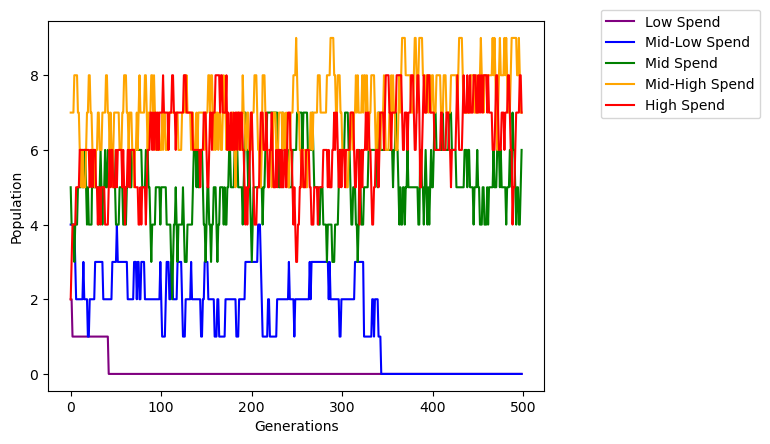

In [14]:
V = Moran_Process((2,4,6,6,2), Runs, A)


Show_Generations(V[1], V[2], V[3], V[4], V[5], Runs)



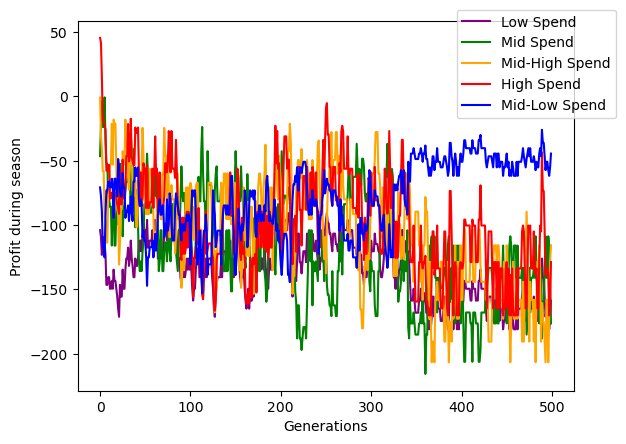

In [15]:
Show_Profit(V[6], V[7], V[8], V[9], V[10], Runs)


5
5
5
5
5
([0.0, 0.0, 4.8, 7.8, 7.4], [0.0, 0.0, 4.8, 7.8, 7.4], [0.0, 0.0, 4.8, 7.8, 7.4], [0.0, 0.0, 4.8, 7.8, 7.4], [0.0, 0.0, 4.8, 7.8, 7.4], 150)


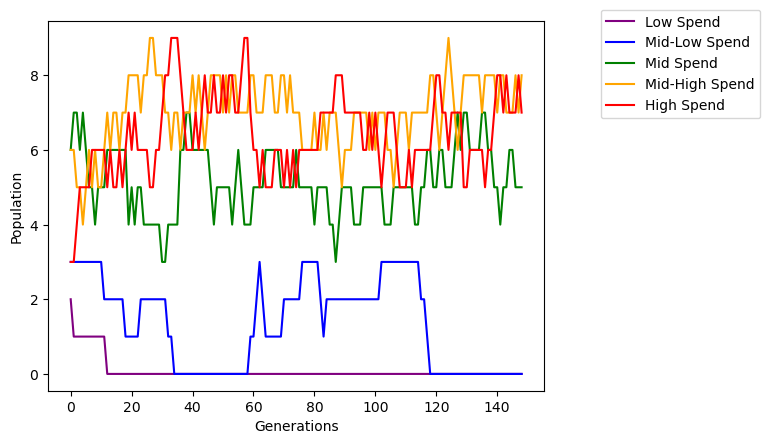

In [29]:
B = Moran_Process((2,4,6,6,2), Runs, A)
C = Moran_Process((2,4,6,6,2), Runs, A)
D = Moran_Process((2,4,6,6,2), Runs, A)
E = Moran_Process((2,4,6,6,2), Runs, A)
F = Moran_Process((2,4,6,6,2), Runs, A)


V = (Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Runs)
print(V)
Show_Generations(B[1], B[2], B[3], B[4], B[5], Runs)

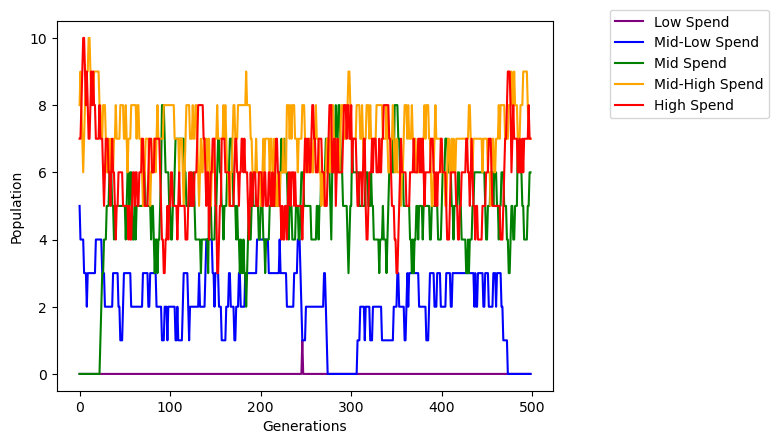

In [11]:

V = Moran_Process((0,6,0,8,6), Runs, A)


Show_Generations(V[1], V[2], V[3], V[4], V[5], Runs)


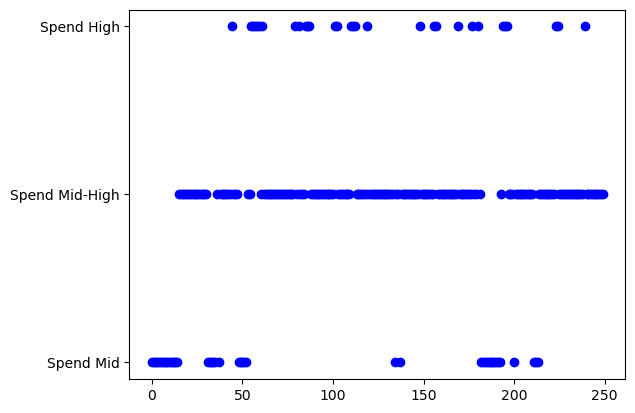

In [10]:
Moran_Process_For_Just_Winners((2,4,6,6,2), 250, A)